In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT

Welcome to JupyROOT 6.22/08


In [2]:
df_bf = pd.read_csv("./WaveData/scope_100.csv", names = ["time", "signal", "sync"], skiprows=2)
df_af = pd.read_csv("./WaveData/scope_101.csv", names = ["time", "signal", "sync"], skiprows=2)

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


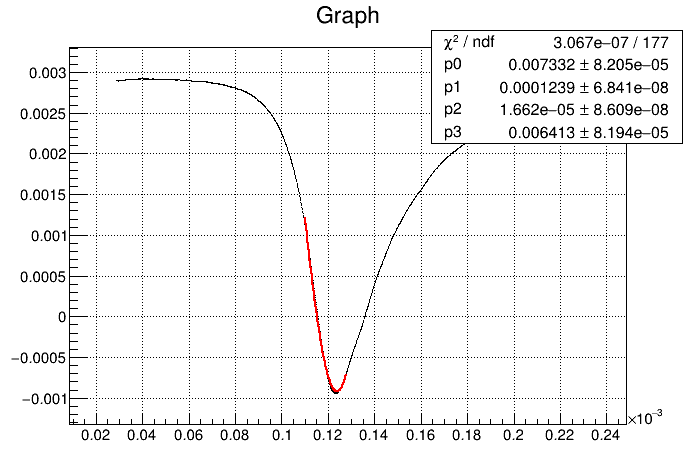

In [3]:
gr_bf = ROOT.TGraph(len(df_bf.time), np.array(df_bf.time), np.array(df_bf.signal))
#bf_fit = ROOT.TF1("bff", "[0] + [1]*x + gaus(x, [2], [3], [4])", 0.115*10**(-3), 0.13*10**(-3))
#bf_fit.SetParameters(1, 1, -0.004, 0.125*10**(-3), 0.0001)
#bf_fit = ROOT.TF1("bff", "gaus(x, [0], [1], [2])", 0.1*10**(-3), 0.14*10**(-3))
#bf_fit.SetParameters(-0.004, 0.125*10**(-3), 0.0001)
bf_fit = ROOT.TF1("f", "[3] - gaus(x,[0],[1],[2])", 0.11*10**(-3), 0.128*10**(-3))
bf_fit.SetParameters(0.006587, 0.1247*10**(-3), 1.826*10**(-5), 0.005733)
gr_bf.Fit(bf_fit, "QR")
gr_bf.Draw("AP")
ROOT.gStyle.SetOptFit(1)
c1 = ROOT.gROOT.FindObject("c1")
c1.SetGridx()
c1.SetGridy()
c1.Draw()

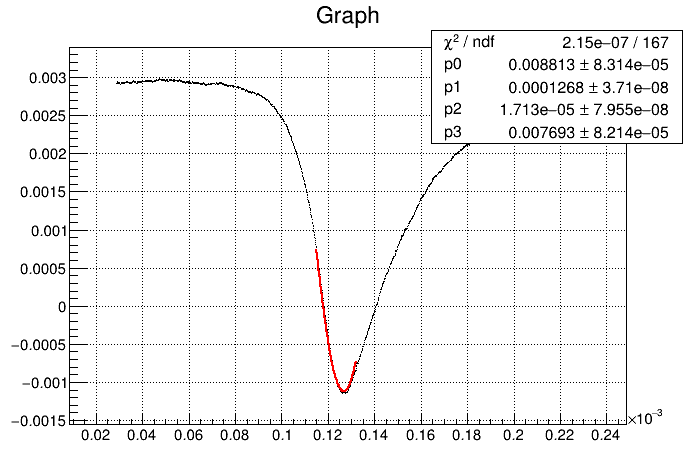

In [4]:
gr_af = ROOT.TGraph(len(df_af.time), np.array(df_af.time), np.array(df_af.signal))
#bf_fit = ROOT.TF1("bff", "[0] + [1]*x + gaus(x, [2], [3], [4])", 0.115*10**(-3), 0.13*10**(-3))
#bf_fit.SetParameters(1, 1, -0.004, 0.125*10**(-3), 0.0001)
#bf_fit = ROOT.TF1("bff", "gaus(x, [0], [1], [2])", 0.1*10**(-3), 0.14*10**(-3))
#bf_fit.SetParameters(-0.004, 0.125*10**(-3), 0.0001)
af_fit = ROOT.TF1("f", "[3] - gaus(x,[0],[1],[2])", 0.115*10**(-3), 0.132*10**(-3))
af_fit.SetParameters(0.006587, 0.1247*10**(-3), 1.826*10**(-5), 0.005733)
gr_af.Fit(af_fit, "QR")
gr_af.Draw("AP")
ROOT.gStyle.SetOptFit(1)
c1 = ROOT.gROOT.FindObject("c1")
c1.SetGridx()
c1.SetGridy()
c1.Draw()

In [67]:
df_bf = pd.read_csv("./WaveData/scope_102.csv", names = ["time", "signal", "sync"], skiprows=2)
df_af = pd.read_csv("./WaveData/scope_103.csv", names = ["time", "signal", "sync"], skiprows=2)

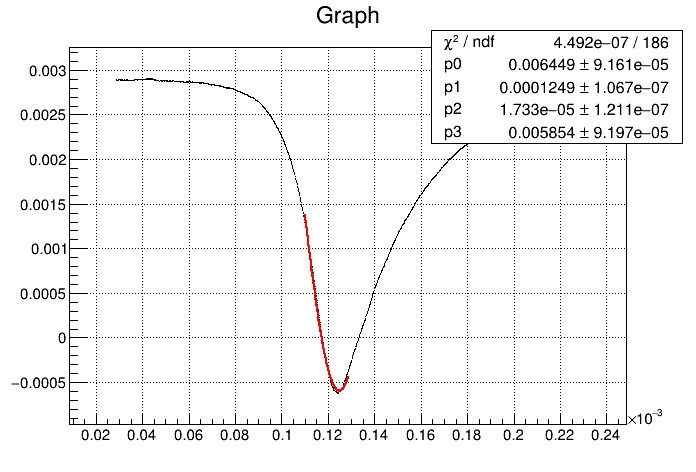

In [74]:
gr_bf = ROOT.TGraph(len(df_bf.time), np.array(df_bf.time), np.array(df_bf.signal))
bf_fit = ROOT.TF1("f", "[3] - gaus(x,[0],[1],[2])", 0.11*10**(-3), 0.1289*10**(-3))
bf_fit.SetParameters(0.006587, 0.1247*10**(-3), 1.826*10**(-5), 0.005733)
gr_bf.Fit(bf_fit, "QR")
gr_bf.Draw("AP")
ROOT.gStyle.SetOptFit(1)
c1 = ROOT.gROOT.FindObject("c1")
c1.SetGridx()
c1.SetGridy()
c1.Draw()

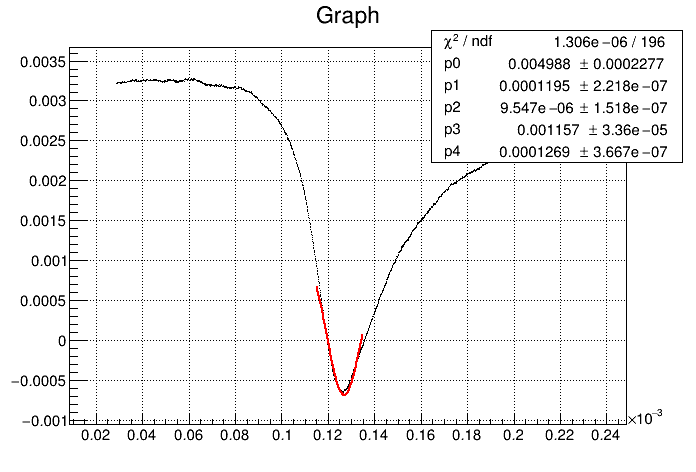

In [106]:
gr_af = ROOT.TGraph(len(df_af.time), np.array(df_af.time), np.array(df_af.signal))
#bf_fit = ROOT.TF1("bff", "[0] + [1]*x + gaus(x, [2], [3], [4])", 0.115*10**(-3), 0.13*10**(-3))
#bf_fit.SetParameters(1, 1, -0.004, 0.125*10**(-3), 0.0001)
#bf_fit = ROOT.TF1("bff", "gaus(x, [0], [1], [2])", 0.1*10**(-3), 0.14*10**(-3))
#bf_fit.SetParameters(-0.004, 0.125*10**(-3), 0.0001)
#af_fit = ROOT.TF1("f", "[3] - gaus(x,[0],[1],[2])", 0.115*10**(-3), 0.13*10**(-3))
#af_fit.SetParameters(0.006587, 0.1247*10**(-3), 1.826*10**(-5), 0.005733)
#af_fit = ROOT.TF1("f", "[3]-gaus(x,[0],[1],[2])*ROOT::Math::normal_cdf(x,[4],[5])", 0.115*10**(-3), 0.14*10**(-3)) #フィットは合うけどピークの位置とパラメータの関係がわからない
#af_fit.SetParameters(0.004315, 0.1082*10**(-3), 1.563*10**(-5), 0.00078, 5.496*10**(-6), 0.1247*10**(-3)) #par for the 36-55, normal_cdf
af_fit = ROOT.TF1("f", "[3]-gaus(x,[0],[1],[2])*ROOT::Math::normal_cdf(x,[2],[4])", 0.115*10**(-3), 0.135*10**(-3)) #フィットは合うけどピークの位置とパラメータの関係がわからない
af_fit.SetParameters(0.004315, 0.1082*10**(-3), 1.563*10**(-5), 0.00078, 0.1247*10**(-3)) #par for the 36-55, normal_cdf
gr_af.Fit(af_fit, "QR")
gr_af.Draw("AP")
ROOT.gStyle.SetOptFit(1)
c1 = ROOT.gROOT.FindObject("c1")
c1.SetGridx()
c1.SetGridy()
c1.Draw()

In [3]:
gr = ROOT.TGraph(len(df.time), np.array(df.time), np.array(df.signal))

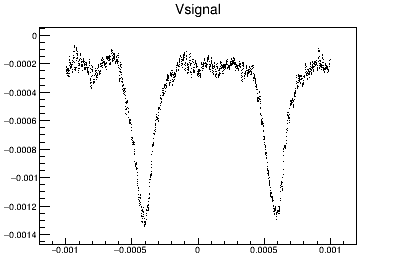

In [4]:
c1 = ROOT.TCanvas("c1", "title", 400, 300)
gr.Draw("AP")
gr.SetTitle("Vsignal")
c1.Draw()

In [5]:
offset_list = []
VsigVsync_list = []
Vsync = df.sync
offset = np.linspace(-0.002, 0.002, 100)
for i in offset:
    offset_list.append(i)
    Vsig = df.signal    
    Vsig_offset = [Vsig[j]+i for j in range(len(Vsig))]
    VsigVsync = sum([Vsig_offset[j]*Vsync[j] for j in range(len(Vsig_offset))])
    VsigVsync_list.append(VsigVsync)

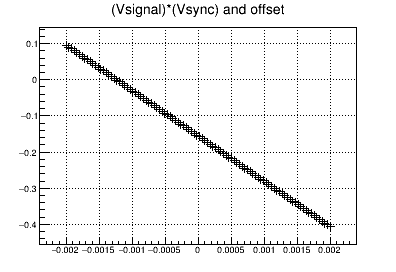

In [6]:
c2 = ROOT.TCanvas("c2", "title", 400, 300)
gr_mult = ROOT.TGraph(len(offset_list), np.array(offset_list), np.array(VsigVsync_list))
gr_mult.Draw("AP")
gr_mult.SetMarkerStyle(2)
gr_mult.SetTitle("(Vsignal)*(Vsync) and offset")
c2.SetGridx()
c2.SetGridy()
c2.Draw()

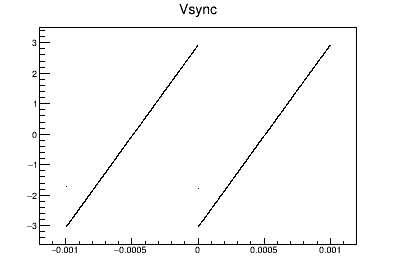

In [7]:
gr_sync = ROOT.TGraph(len(Vsync), np.array(df.time), np.array(Vsync))
c3 = ROOT.TCanvas("c3", "title", 400, 300)
gr_sync.Draw("AP")
gr_sync.SetTitle("Vsync")
c3.Draw()

In [8]:
Vsig = df.signal
Nshifts = []
VsigVsync_list = []
j = 0
import time
for i in range (1, len(Vsig)+1):
    Nshifts.append(j)
    Vsig_left = list(Vsig[:i])
    Vsig_right = list(Vsig[i:])
    Vsig_shift = Vsig_right + Vsig_left
    VsigVsync = sum([Vsig_shift[j]*Vsync[j] for j in range(len(Vsig_shift))])
    VsigVsync_list.append(VsigVsync)
    j += 1
    
    

KeyboardInterrupt: 

In [ ]:
iNshifts = Nshifts
iVsigVsync_list = VsigVsync_list

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


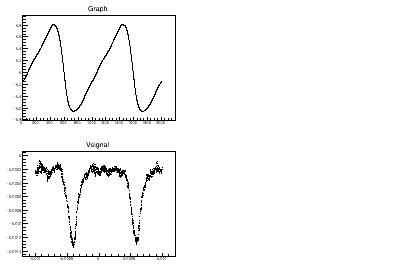

In [ ]:
gr_shift = ROOT.TGraph(len(iNshifts), np.array(iNshifts, dtype="float"), np.array(iVsigVsync_list))
c4 = ROOT.TCanvas("c4", "title", 400, 300)
c4.Divide(2,2)
c4.cd(1)
gr_shift.Draw("AP")
c4.cd(3)
gr.Draw("AP")
c4.Draw()

In [ ]:
Vsig = df.signal
Nshifts = []
VsigVsync_list = []
g = []
j = 0
import time
c5 = ROOT.TCanvas("c5", "title", 400, 400)
c5.Divide(2, 2)
for i in range (40, 120, 20):
    Nshifts.append(i)
    Vsig_left = list(Vsig[:i])
    Vsig_right = list(Vsig[i:])
    Vsig_shift = Vsig_right + Vsig_left
    VsigVsync = sum([Vsig_shift[j]*Vsync[j] for j in range(len(Vsig_shift))])
    VsigVsync_list.append(VsigVsync)
    j += 1
    c5.cd(j)
    gr1 = ROOT.TGraph(len(Vsig_shift), np.array(df.time), np.array(Vsig_shift))
    g.append(gr1)
    g[j-1].Draw("AP")
    
c5.Draw()

c6 = ROOT.TCanvas("c6", "title", 400, 300)
gr_shift = ROOT.TGraph(len(Nshifts), np.array(Nshifts, dtype="float"), np.array(VsigVsync_list))
gr_shift.SetMarkerStyle(2)
gr_shift.Draw("AP")
gr_shift.SetTitle("(Vsig*Vsync) against data shift")
c6.SetGridx()
c6.SetGridy()
c6.Draw()

c5.SaveAs("./analysis/ShiftedWaveform.pdf")
c6.SaveAs("./analysis/V*V_Shift.pdf")

In [ ]:
len(VsigVsync_list)

9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


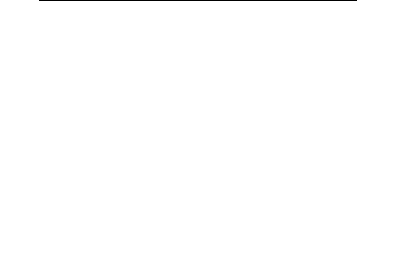

In [18]:
gr_shift = ROOT.TGraph(len(VsigVsync_list), np.array(Nshifts, dtype="float"), np.array(VsigVsync_list))
c4 = ROOT.TCanvas("c4", "title", 400, 300)
gr_shift.Draw("AP")
c4.Draw()

In [ ]:
for j in range(len(peak_list)):
    for i in range(10):
        par, cov = curve_fit(fun, df_list[j].time, df_list[j].signal, p0 = (0, 0.003, 0.091+i*0.002, 0.0005))
        x = np.linspace(0.09+i*0.002, 0.091+i*0.002, 1000)
        y = fun(x, par[0], par[1], par[2], par[3])
        if i == 0:
            plt.plot(df_list[j].time, df_list[j].signal)
            #plt.show()
        plt.plot(x, y)
        peak_list[j].append(par[2])
    plt.savefig("fig" + str(j) + ".pdf")
    plt.show()
    plt.close()

In [52]:
sync_list = df.sync.values.tolist()
time_list = df.time.values.tolist()

In [53]:
sweep = []
time = []
for i in range(4, len(sync_list)):
    i_b = sync_list[i]
    i_f = sync_list[i+1]
    if i_f > i_b:
        sweep.append(sync_list[i])
        time.append(time_list[i])
    if i_f < i_b:
        sweep.append(sync_list[i])
        time.append(time_list[i])
        break

In [74]:
#time = np.array(time, "d")
#sweep = np.array(sweep, "d")
linear_model=np.polyfit(time,sweep,1)
linear_model

array([3013.81040719, -273.75157239])

In [79]:
freq = [7385 + 250/3*i for i in sweep]

In [76]:
freq_lin=np.polyfit(time,freq,1)
freq_lin

array([251150.86726587, -15427.63103232])

In [80]:
freq_lin[0]*peak[0] + freq_lin[1]

7309.227056729351

In [95]:
peak_ideal = []
for i in range(len(peak)):
    p = peak[0] + i/501
    peak_ideal.append(p)

In [100]:
peak_dev = [peak[i]-peak_ideal[i] for i in range(len(peak))]
peak_dev

[0.0,
 -1.1760889504983107e-05,
 1.0228093064140742e-05,
 -1.2282536226912444e-05,
 -1.6301869352239318e-05,
 -6.4020239813888935e-06,
 -8.223481996985638e-06,
 -9.062730595144064e-08,
 -6.81053236431528e-06,
 -4.829962517119424e-06]

In [97]:
f_dev = []
for i in range(len(peak)):
    f_dev.append(freq_lin[0]*peak_dev[i])

In [99]:
f_dev # in kHz

[0.0,
 -2.9537575989945517,
 2.568794443534956,
 -3.0847696256135015,
 -4.0942286258697775,
 -1.6078738751827053,
 -2.0653346354881945,
 -0.02276112648767347,
 -1.7104711098400447,
 -1.2130492750361779]

In [22]:
df22 = pd.read_csv("scope_22.csv", names = ["time", "signal", "sync"], skiprows = 2)
df23 = pd.read_csv("scope_23.csv", names = ["time", "signal", "sync"], skiprows = 2)

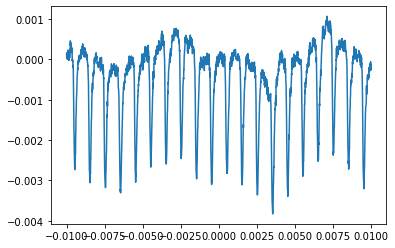

In [20]:
plt.plot(df22.time, df22.signal)
plt.show()

In [24]:
par, cov = curve_fit(fun, df22.time, df22.signal, p0 = (0, 0.003, 0.0005, 0.00001))

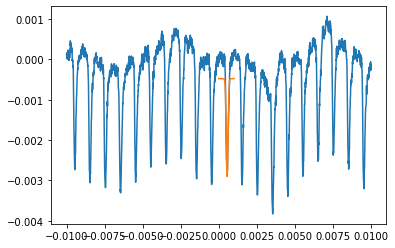

In [25]:
x = np.linspace(0.0, 0.001, 1000)
y = fun(x, par[0], par[1], par[2], par[3])
plt.plot(df22.time, df22.signal)
plt.plot(x, y)

In [26]:
par

array([-4.77986748e-04,  2.42284498e-03,  5.48402917e-04,  5.94514008e-05])

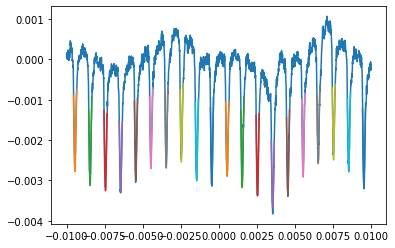

In [27]:

peak22 = []
for i in range(20):
    par, cov = curve_fit(fun, df22.time, df22.signal, p0 = (0, 0.003, 5.48402917*10**(-4)-10/1001+i/1001, 6*10**(-5)))
    x = np.linspace(5.48402917*10**(-4)-10/1001+i/1001-0.0001, 5.48402917*10**(-4)-10/1001+i/1001+0.0001, 1000)
    y = fun(x, par[0], par[1], par[2], par[3])
    if i == 0:
        plt.plot(df22.time, df22.signal)
        #plt.show()
    plt.plot(x, y)
    peak22.append(par[2])
#plt.savefig("fig" + str(j) + ".pdf")
plt.show()
plt.close()

In [ ]:
peak22

In [ ]:
peak_ideal = []
for i in range(11):
    p = peak22[10] -10/1001 + i/1001
    peak_ideal.append(p)

for i in range(1, 10):
    p = peak22[10] + i/1001
    peak_ideal.append(p)
    
peak_ideal

In [59]:
peak_dev = [peak22[i]-peak_ideal[i] for i in range(len(peak22))]

In [ ]:
f_dev = []
for i in range(len(peak22)):
    f_dev.append(1001*10**3*peak_dev[i])
    
f_dev

In [61]:
import statistics as stat

mean = stat.mean(f_dev)
std = stat.stdev(f_dev)

In [62]:
mean

-4.591293232816975

In [63]:
std

3.906112874592937

In [64]:
F_dev = 700
F_0 = 7225

EPR_freq = F_dev*10**3*peak22[10]+F_0-F_dev/2
EPR_freq

7258.87438422206

In [ ]:
EPR_freq_list = [EPR_freq+i for i in f_dev]
EPR_freq_list

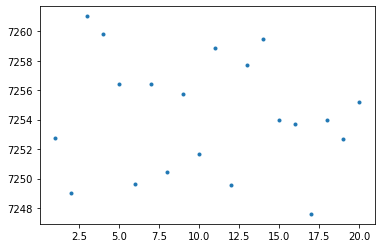

In [74]:
x = np.linspace(1, 20, 20)
plt.plot(x, EPR_freq_list, ".")
plt.show()

In [105]:
df28 = pd.read_csv("scope_28.csv", names = ["time", "signal", "sync"], skiprows = 2)
df29 = pd.read_csv("scope_29.csv", names = ["time", "signal", "sync"], skiprows = 2)
df30 = pd.read_csv("scope_30.csv", names = ["time", "signal", "sync"], skiprows = 2)
df31 = pd.read_csv("scope_31.csv", names = ["time", "signal", "sync"], skiprows = 2)
df32 = pd.read_csv("scope_32.csv", names = ["time", "signal", "sync"], skiprows = 2)
df33 = pd.read_csv("scope_33.csv", names = ["time", "signal", "sync"], skiprows = 2)
df34 = pd.read_csv("scope_34.csv", names = ["time", "signal", "sync"], skiprows = 2)
df35 = pd.read_csv("scope_35.csv", names = ["time", "signal", "sync"], skiprows = 2)

df_bf = [df28, df29, df30, df31, df32]
df_af = [df33, df34, df35]

In [115]:
peak_bf = []
peak_af = []

for j in range(len(df_bf)):
    for i in range(20):
        par, cov = curve_fit(fun, df_bf[j].time, df_bf[j].signal, p0 = (0, 0.003, 5.48402917*10**(-4)-10/1001+i/1001, 6*10**(-5)))
        x = np.linspace(5.48402917*10**(-4)-10/1001+i/1001-0.0001, 5.48402917*10**(-4)-10/1001+i/1001+0.0001, 1000)
        y = fun(x, par[0], par[1], par[2], par[3])
        if i == 0:
            plt.plot(df_bf[j].time, df_bf[j].signal)
            #plt.show()
        plt.plot(x, y)
        peak_bf.append(par[2])
        if i == 19:
            plt.savefig("C:/Users/nishi/mypython/jupyter/peak/bf" + str(j) + ".pdf")
    #plt.savefig("fig" + str(j) + ".pdf")
    plt.close()

In [131]:
for j in range(len(df_af)):
    for i in range(20):
        par, cov = curve_fit(fun, df_af[j].time, df_af[j].signal, p0 = (0, 0.003, 5.48402917*10**(-4)-10/1001+i/1001, 6*10**(-5)))
        x = np.linspace(5.48402917*10**(-4)-10/1001+i/1001-0.0001, 5.48402917*10**(-4)-10/1001+i/1001+0.0001, 1000)
        y = fun(x, par[0], par[1], par[2], par[3])
        if i == 0:
            plt.plot(df_af[j].time, df_af[j].signal)
            #plt.show()
        plt.plot(x, y)
        peak_af.append(par[2])
        if i == 19:
            plt.savefig("C:/Users/nishi/mypython/jupyter/peak/af" + str(j) + ".pdf")
    #plt.savefig("fig" + str(j) + ".pdf")
    plt.close()

In [132]:
peak_ideal_bf = []
peak_ideal_af = []
EPR_freq_list = []
k = 0
for j in range(len(df_bf)):
    p_zenhan = peak_bf[k : k+11]
    p_kouhan = peak_bf[k+11 : k+20]
    for i in range(0, 11):
        p = peak_bf[10+2*j*10] -10/1000 + i/1000
        peak_ideal_bf.append(p)
        k += 1

    for i in range(1, 10):
        p = peak_bf[10+2*j*10] + i/1001
        peak_ideal_bf.append(p)
        k += 1

        
for j in range(len(df_af)):
    p_zenhan = peak_af[k : k+11]
    p_kouhan = peak_af[k+11 : k+20]
    for i in range(0, 11):
        p = peak_af[10+2*j*10] -10/1000 + i/1000
        peak_ideal_af.append(p)
        k += 1

    for i in range(1, 10):
        p = peak_af[10+2*j*10] + i/1001
        peak_ideal_af.append(p)
        k += 1

In [142]:
len(peak_ideal_af)

60

In [135]:
peak_dev_bf = [peak_bf[i]-peak_ideal_bf[i] for i in range(len(peak_bf))]
peak_dev_af = [peak_af[i]-peak_ideal_af[i] for i in range(len(peak_af))]

In [144]:
f_dev_bf = [1000*10**3*i for i in peak_dev_bf]
f_dev_af = [1000*10**3*i for i in peak_dev_af]
len(f_dev_af)

60

In [ ]:
f_dev = f_dev_bf + f_dev_af
f_dev

In [172]:
F_dev = 700
F_0 = 7225
F_mod = 1000
EPR_freq_list_bf = []
EPR_freq_list_af = []

for i in range(len(df_bf)):
    iEPR_freq = F_dev*F_mod*peak_bf[10+2*i*10]+F_0-F_dev/2
    for j in f_dev_bf[20*i:20*i+20]:
        EPR_freq_bf = iEPR_freq+j
        EPR_freq_list_bf.append(EPR_freq_bf)
    
for i in range(len(df_af)):
    iEPR_freq = F_dev*F_mod*peak_af[10+2*i*10]+F_0-F_dev/2
    for j in f_dev_af[20*i:20*i+20]:
        EPR_freq_af = iEPR_freq+j
        EPR_freq_list_af.append(EPR_freq_af)
    
EPR_freq_list = EPR_freq_list_bf + EPR_freq_list_af
        
    


0.0005373382857414861
0.0005344451953822307
0.0005288744305361339
0.0005396531937708255
0.0005343115542989217


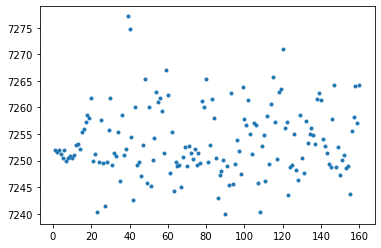

In [170]:
plt.plot(np.linspace(1, 160, 160), EPR_freq_list, ".")
plt.show()

In [174]:
df36 = pd.read_csv("scope_36.csv", names = ["time", "signal", "sync"], skiprows = 0)
df36

,time,signal,sync
0,x-axis,1,2
1,second,Volt,Volt
2,-5.000000E-03,-742.400E-06,-2.755433468E+00
3,-4.995000E-03,-754.837E-06,-3.020609340E+00
4,-4.990000E-03,-717.123E-06,-2.995835469E+00
...,...,...,...
1997,+4.975000E-03,-656.392E-06,+2.797462849E+00
1998,+4.980000E-03,-759.743E-06,+2.827442734E+00
1999,+4.985000E-03,-621.885E-06,+2.861119790E+00
2000,+4.990000E-03,-671.297E-06,+2.883619794E+00


In [7]:
df56 = pd.read_csv("./WaveData/scope_56.csv", names = ["time", "signal", "sync"], skiprows = 2)

In [8]:
df56

,time,signal,sync
0,-0.001000,0.000526,-1.593059
1,-0.000999,0.000600,-3.052054
2,-0.000998,0.000533,-3.042255
3,-0.000997,0.000542,-3.034768
4,-0.000996,0.000567,-3.027795
...,...,...,...
1995,0.000995,0.000562,2.912789
1996,0.000996,0.000583,2.920603
1997,0.000997,0.000564,2.928266
1998,0.000998,0.000539,2.934874
